In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./input/test.csv
./input/train.csv


In [2]:
train_data = pd.read_csv("./input/train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test_data = pd.read_csv("./input/test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Let's see which columns have missing data and populate them

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
nans = train_data.shape[0] - train_data.dropna().shape[0]
print ("%d rows have missing values in the train data" %nans)
train_data.isnull().sum()

708 rows have missing values in the train data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
print(train_data.Age.value_counts(sort=True))
age_mean = np.mean(train_data.Age)
age_std = np.std(train_data.Age)
print(age_mean, age_std)

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
29.69911764705882 14.516321150817316


Let's populate the rows which are missing the Age. We'll use a random age from a normal distribution of the other ages. We could also use the mode ($24$) or the mean ($29.7 \approx 30$)

In [9]:
train_data.Age.fillna(np.round(np.random.normal(age_mean, age_std)), inplace=True)
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now let's go with the two embarked missing data

In [10]:
print(train_data.Embarked.value_counts(sort=True))

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Makes sense to make them embark in Southampton

In [11]:
train_data.Embarked.fillna('S', inplace=True)
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Now, let's try linear regression. Let's choose the features that we need. Cabin has too many NaN to be relevant, and also we don't have information on what it means. Name is clearly not relevant. The Ticket number doesn't give any relevant information that we couldn't get from the Pclass or Fare. And finally, it looks probable that SibSp and Parch are correlated, . So, the features chosen are:
* Pclass (transform to 3 columns)
* Sex (transform to Female, boolean)
* Age
* FMembers (SibSp + Parch)
* Fare
* Embarked (transform to 3 columns)

In [12]:
ftrain = train_data.copy()
ftrain['1C'] = ftrain['Pclass'].map(lambda c : 1 if c == 1 else 0)
ftrain['2C'] = ftrain['Pclass'].map(lambda c : 1 if c == 2 else 0)
ftrain['3C'] = ftrain['Pclass'].map(lambda c : 1 if c == 3 else 0)
ftrain['Female'] = ftrain['Sex'].map(str.lower).map(lambda sex : 1 if sex == 'female' else 0)
ftrain['FMembers'] = ftrain['SibSp'] + ftrain['Parch']
ftrain['ES'] = ftrain['Embarked'].map(str.upper).map(lambda port : 1 if port == 'S' else 0)
ftrain['EC'] = ftrain['Embarked'].map(str.upper).map(lambda port : 1 if port == 'C' else 0)
ftrain['EQ'] = ftrain['Embarked'].map(str.upper).map(lambda port : 1 if port == 'Q' else 0)
ftrain.drop(['Name', 'Ticket', 'Cabin','Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], axis='columns', inplace=True)
ftrain

,PassengerId,Survived,Age,Fare,1C,2C,3C,Female,FMembers,ES,EC,EQ
0,1,0,22.0,7.2500,0,0,1,0,1,1,0,0
1,2,1,38.0,71.2833,1,0,0,1,1,0,1,0
2,3,1,26.0,7.9250,0,0,1,1,0,1,0,0
3,4,1,35.0,53.1000,1,0,0,1,1,1,0,0
4,5,0,35.0,8.0500,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,13.0000,0,1,0,0,0,1,0,0
887,888,1,19.0,30.0000,1,0,0,1,0,1,0,0
888,889,0,21.0,23.4500,0,0,1,1,3,1,0,0
889,890,1,26.0,30.0000,1,0,0,0,0,0,1,0


Now let's normalize `Age` and `Fare`

In [13]:
scaler = StandardScaler()
m_age, std_age = np.mean(ftrain['Age']), np.std(ftrain['Age'])
m_fare, std_fare = np.mean(ftrain['Fare']), np.std(ftrain['Fare'])
ftrain['NAge'] = scaler.fit_transform(ftrain['Age'].to_numpy().reshape(-1, 1))
ftrain['NFare'] = scaler.fit_transform(ftrain['Fare'].to_numpy().reshape(-1, 1))
ftrain.drop(['Fare', 'Age'], axis='columns', inplace=True)
ftrain

,PassengerId,Survived,1C,2C,3C,Female,FMembers,ES,EC,EQ,NAge,NFare
0,1,0,0,0,1,0,1,1,0,0,-0.443933,-0.502445
1,2,1,1,0,0,1,1,0,1,0,0.745636,0.786845
2,3,1,0,0,1,1,0,1,0,0,-0.146541,-0.488854
3,4,1,1,0,0,1,1,1,0,0,0.522592,0.420730
4,5,0,0,0,1,0,0,1,0,0,0.522592,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,1,0,0,0,1,0,0,-0.072193,-0.386671
887,888,1,1,0,0,1,0,1,0,0,-0.666977,-0.044381
888,889,0,0,0,1,1,3,1,0,0,-0.518281,-0.176263
889,890,1,1,0,0,0,0,0,1,0,-0.146541,-0.044381


Let's transform this table to numeric parameters. The features have indexes from 0 to 7 starting at 1C.

* **X\[:,0\]** = Is first class
* **X\[:,1\]** = Is second class
* **X\[:,2\]** = Is third class
* **X\[:,3\]** = Is female
* **X\[:,4\]** = # Family members
* **X\[:,5\]** = Has embarked in Southampton
* **X\[:,6\]** = Has embarked in Cherbourg
* **X\[:,7\]** = Has embarked in Queenstown
* **X\[:,8\]** = Z-Score Normalized Age
* **X\[:,9\]** = Z-Score Normalized Fare

In [26]:
X = ftrain.iloc[:, 2:].to_numpy()
y = ftrain['Survived'].to_numpy()

Let's see some 1-to-1 graphs.

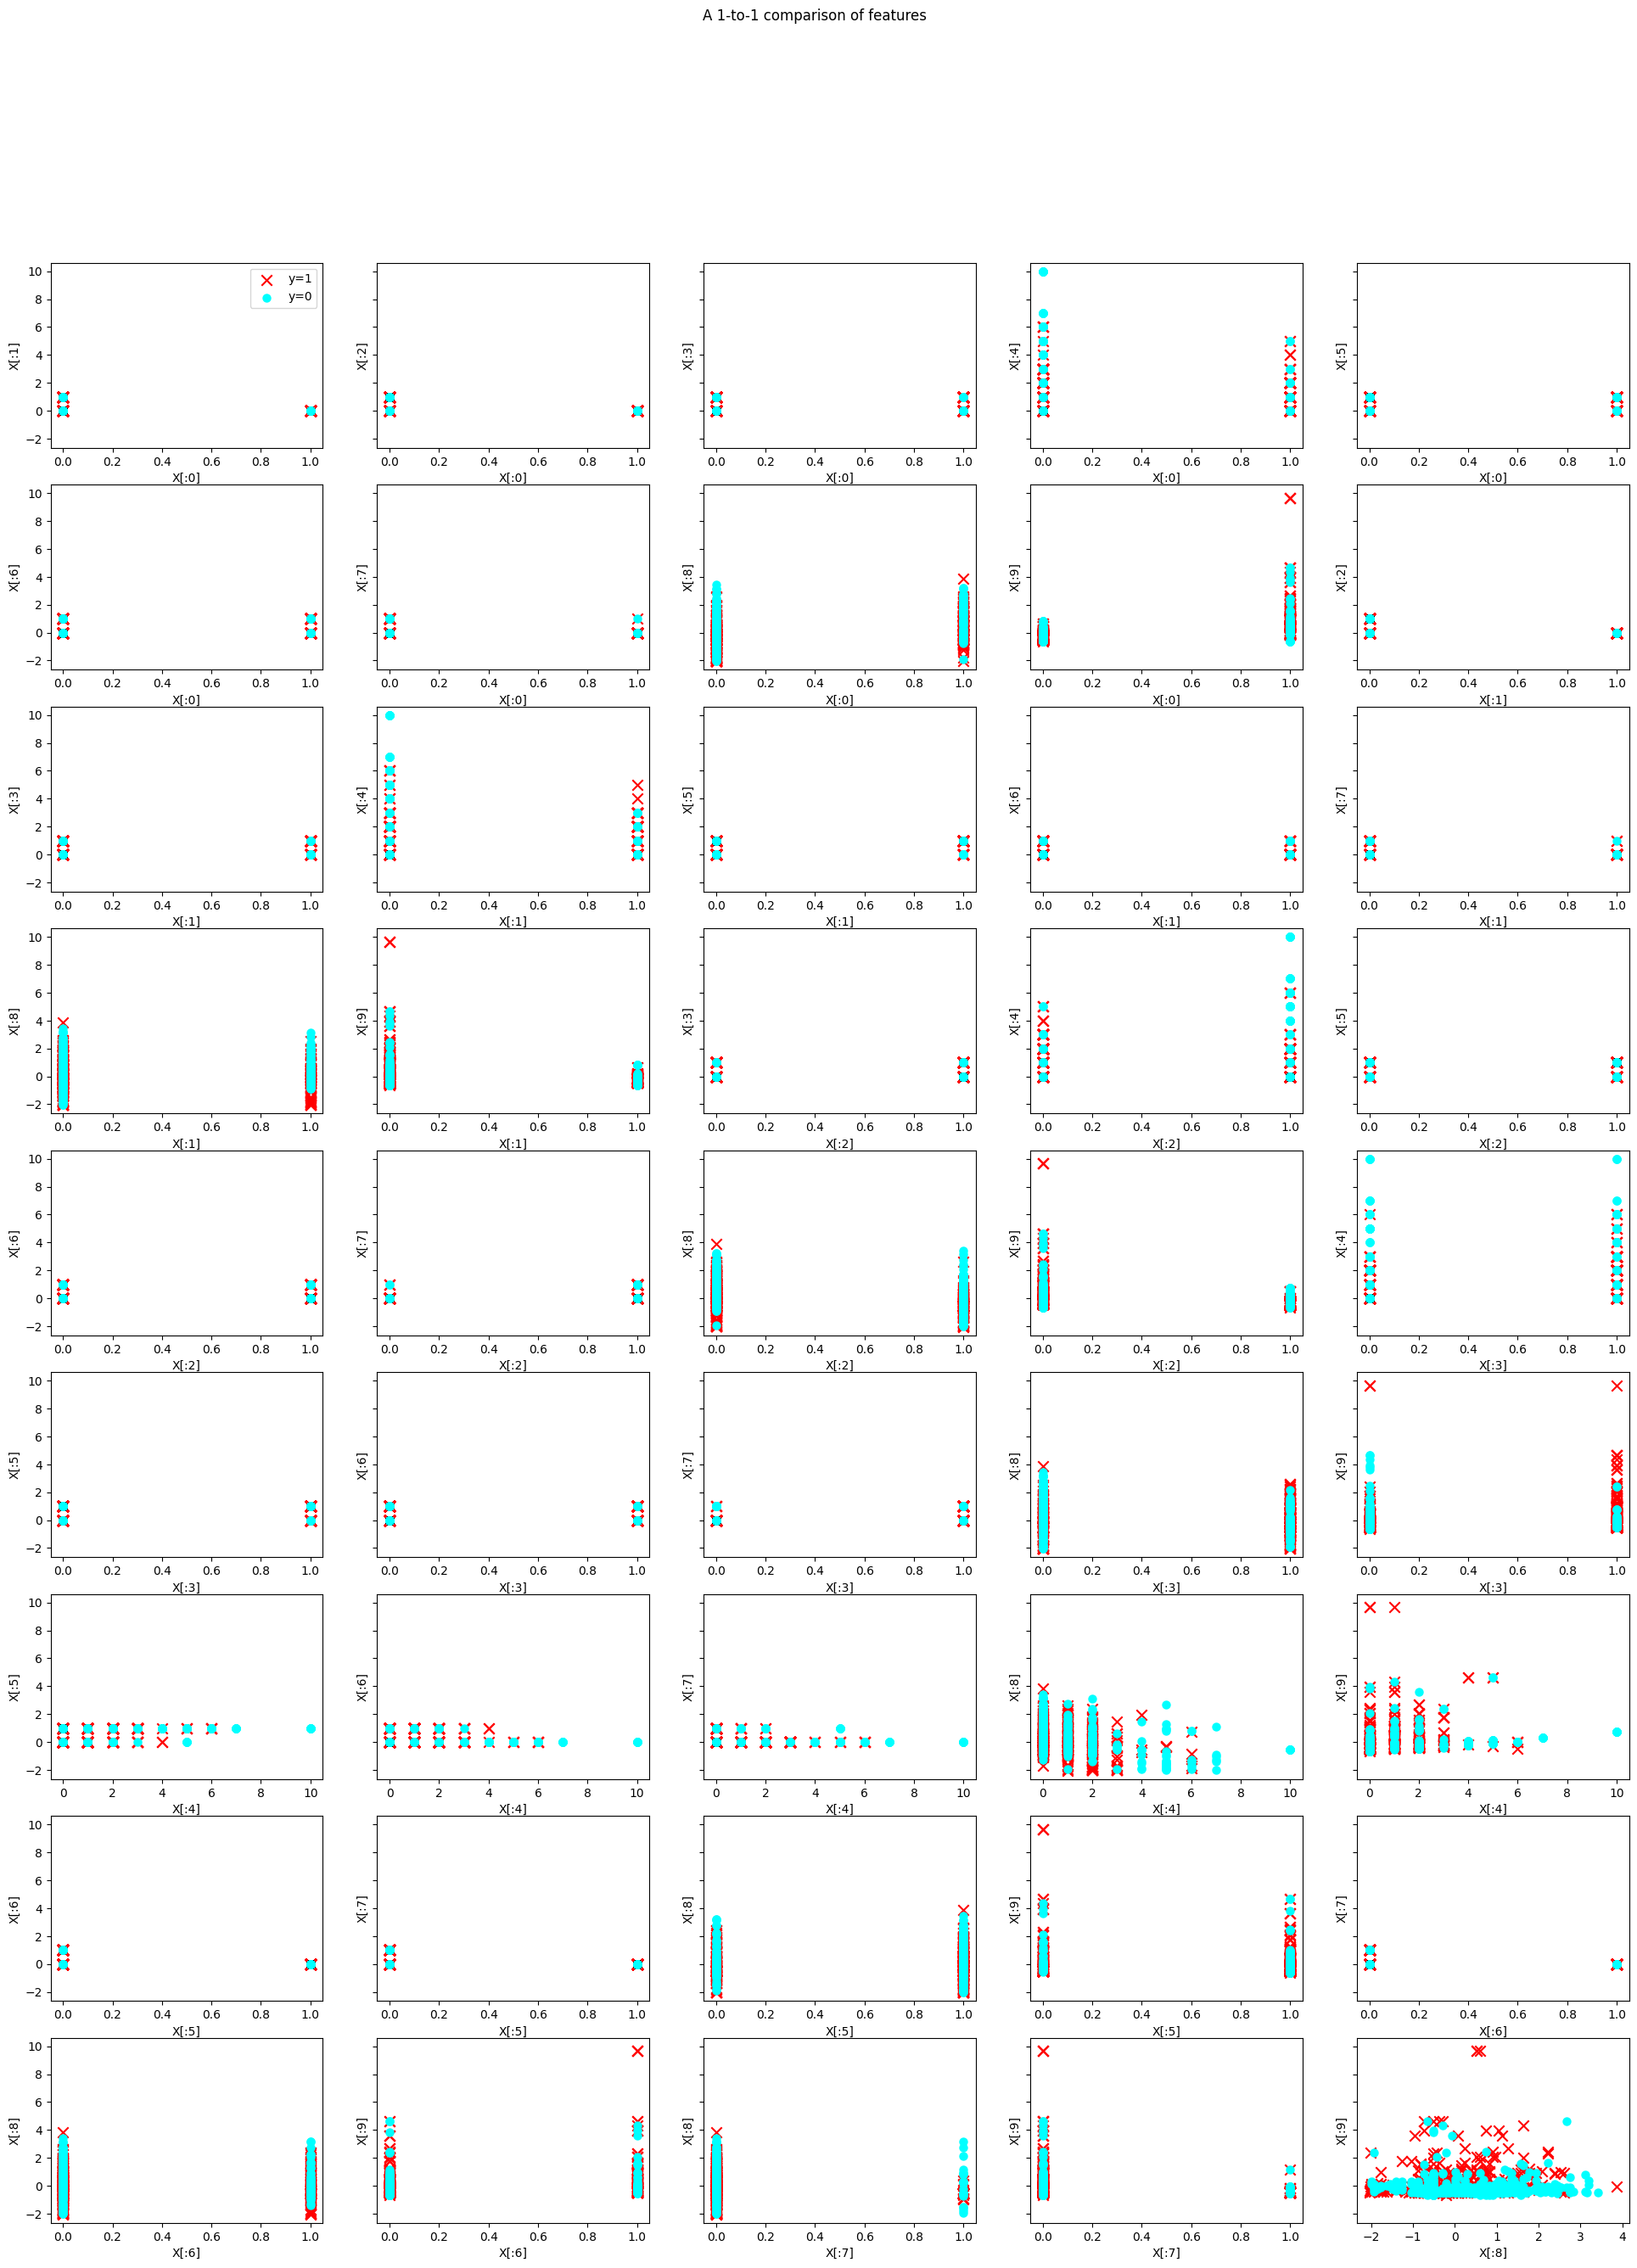

In [27]:
# plot predictions and targets vs original features    
fig, axs=plt.subplots(9,5,figsize=(24,30),sharey=True)
rows, cols = X.shape
idx = 0

for i in range(cols):
    for j in range(i + 1, cols):
        pos_label="y=1"
        neg_label="y=0"
        s=80
        loc='best'
        axpos = idx // 5, idx % 5
        
        # Find Indices of Positive and Negative Examples
        pos = y == 1
        neg = y == 0
        pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
        neg = neg.reshape(-1,)
        
        # Plot examples
        axs[axpos].scatter(X[pos, i], X[pos, j], marker='x', s=s, c = 'red', label=pos_label)
        axs[axpos].scatter(X[neg, i], X[neg, j], marker='.', s=s, c = 'cyan', label=neg_label, facecolors='none', lw=3)

        axs[axpos].set_xlabel(f"X[:{i}]")
        axs[axpos].set_ylabel(f"X[:{j}]")
        
        idx += 1
axs[0][0].legend()
fig.suptitle("A 1-to-1 comparison of features")
plt.show()

There are no apparent correlations between variables:

In [28]:
lr_model = LogisticRegression()
lr_model.fit(X, y)
print("Accuracy on training set:", lr_model.score(X, y))
lr_model.coef_

Accuracy on training set: 0.7991021324354658


array([[ 0.90978689,  0.14773579, -1.05735006,  2.62600677, -0.19963103,
        -0.22560257,  0.20264935,  0.02312584, -0.42995831,  0.15336155]])

79% accuracy on train is not much better than just saying women survive (74.2%). We need a better model.

In [29]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(model.score(X,y))

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

0.8159371492704826
Your submission was successfully saved!
